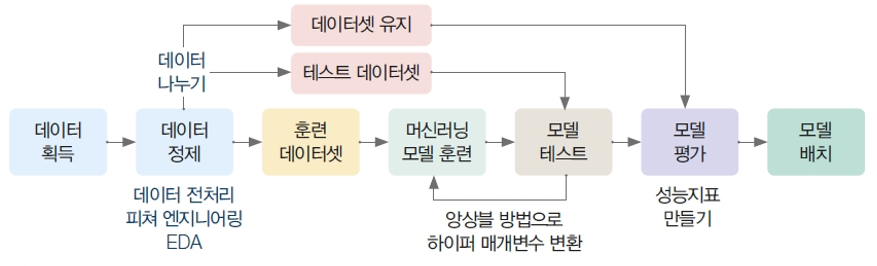

데이터 확보의 최적의 장소
  - 데이콘, 캐글, 공공기관...
  - https://www.kaggle.com/c/titanic/data

In [1]:
!unzip '/content/titanic.zip'

Archive:  /content/titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [2]:
import numpy as np
import pandas as pd

In [4]:
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

In [6]:
train_df.columns, test_df.columns

(Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'),
 Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
        'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'))

In [7]:
set(train_df.columns) - set(test_df.columns)

{'Survived'}

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
df = pd.concat([train_df,test_df])
df = df.reset_index(drop=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
# PassengerId	승객고유번호
# Survived	생존유무 0:사망 1:생존
# Pclass	1:1등석 2:2등석 3:3등석
# Name	승객이름
# Sex	성별
# Age	 나이
# SibSp	 타이타닉밖의 형제자매/부부의 수
# Parch	타이타닉밖의 부모/자식의 수
# Ticket	티켓번호
# Fare	 티켓가격
# Cabin	 객실번호
# Embarked 승선항구

In [18]:
# 결측치 여부 조사
df.isnull().mean()

PassengerId    0.000000
Survived       0.319328
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.200917
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000764
Cabin          0.774637
Embarked       0.001528
dtype: float64

데이터 노트작성
  - 각 데이터의 현재 데이터타입을 올바르게 정의하고
  - 어떻게 처리할 것인지를 적는다.

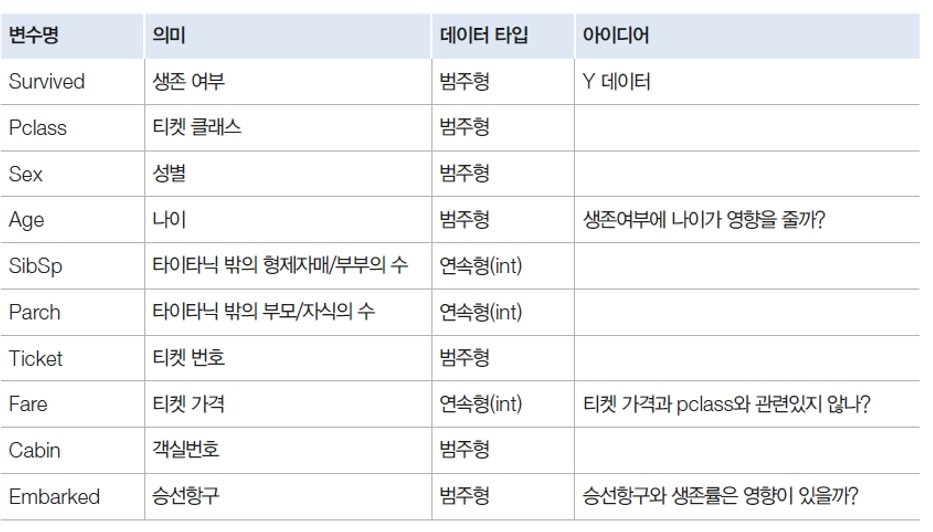

In [59]:
drop_list = ['Ticket','Fare','Cabin','PassengerId','Name','Survived']

In [60]:
new_df = df.drop(columns=drop_list)

In [61]:
new_df.isnull().mean()

Pclass      0.000000
Sex         0.000000
Age         0.200917
SibSp       0.000000
Parch       0.000000
Embarked    0.001528
dtype: float64

데이터의 모양 확인
  - T함수를 사용

In [62]:
new_df.head(2).T

,0,1
Pclass,3,1
Sex,male,female
Age,22.0,38.0
SibSp,1,1
Parch,0,0
Embarked,S,C


In [63]:
# 결측치  나이는 성별에따른 평균값으로 처리

In [64]:
new_df.groupby('Sex')['Age'].mean()

Sex
female    28.687088
male      30.585228
Name: Age, dtype: float64

In [65]:
new_df.groupby('Sex')['Age'].transform('mean')

0       30.585228
1       28.687088
2       28.687088
3       28.687088
4       30.585228
          ...    
1304    30.585228
1305    28.687088
1306    30.585228
1307    30.585228
1308    30.585228
Name: Age, Length: 1309, dtype: float64

In [66]:
new_df.groupby(['Pclass','Sex'])['Age'].mean()

Pclass  Sex   
1       female    37.037594
        male      41.029272
2       female    27.499223
        male      30.815380
3       female    22.185329
        male      25.962264
Name: Age, dtype: float64

In [67]:
#  선실등급,성별 에따른 나이의 평균
new_df.groupby(['Pclass','Sex'])['Age'].transform('mean')

0       25.962264
1       37.037594
2       22.185329
3       37.037594
4       25.962264
          ...    
1304    25.962264
1305    37.037594
1306    25.962264
1307    25.962264
1308    25.962264
Name: Age, Length: 1309, dtype: float64

In [68]:
new_df['Age'] = new_df['Age'].fillna(  new_df.groupby(['Pclass','Sex'])['Age'].transform('mean')      )

In [69]:
new_df.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    2
dtype: int64

In [71]:
new_df['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [73]:
new_df['Embarked'] = new_df['Embarked'].fillna('S')

In [74]:
new_df.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

범주형 데이터 처리 : 원핫인코딩
  - 범주형 데이터를 식별
    - df.info() : 열별로 데이터 타입 확인

In [75]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Sex       1309 non-null   object 
 2   Age       1309 non-null   float64
 3   SibSp     1309 non-null   int64  
 4   Parch     1309 non-null   int64  
 5   Embarked  1309 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 61.5+ KB


데이터 타입 정리

In [76]:
object_columns = ['Sex', 'Embarked' ]
numeric_columns = ['Pclass','Age','SibSp','Parch']

In [77]:
# 원핫인코딩
pd.get_dummies(new_df)

,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.000000,1,0,0,1,0,0,1
1,1,38.000000,1,0,1,0,1,0,0
2,3,26.000000,0,0,1,0,0,0,1
3,1,35.000000,1,0,1,0,0,0,1
4,3,35.000000,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
1304,3,25.962264,0,0,0,1,0,0,1
1305,1,39.000000,0,0,1,0,1,0,0
1306,3,38.500000,0,0,0,1,0,0,1
1307,3,25.962264,0,0,0,1,0,0,1


데이터 전처리 과정
  - 1. 데이터 확보
  - 2. 도메인지식을 바탕으로 불필요한 컬럼 drop
  - 3. 결측치 확인
    - df.isnull().sum(),  df.isnull().mean(), df.info()
  - 4. 결측치 처리( fillna() ) 방안
    - 연속형(수치형)
      - 평균 , 최대,최소,표준편차..
      - df.groupby('')[''].transform('mean')
    - 범주형   
      - 최빈값
  - 5. 범주형 데이터 처리
    - 원핫인코딩적용
      

데이터 시각화
  - y 값과 각 타입간의 관계
  - 범주형 타입간에 어떤 관계가 있는지를 확인

성별에 따른 생존유무 시각화
선실등급에 따른 생존유무 시각화
승선항에 따른 생존유무 시각화

In [81]:
new_df['Survived'] = df['Survived']

In [88]:
new_df = new_df[new_df['Survived'].isnull().astype(int) == 0]
new_df.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
0,3,male,22.0,1,0,S,0.0
1,1,female,38.0,1,0,C,1.0
2,3,female,26.0,0,0,S,1.0
3,1,female,35.0,1,0,S,1.0
4,3,male,35.0,0,0,S,0.0


In [90]:
new_df['Survived'] = new_df['Survived'].astype(int)

In [91]:
new_df.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
0,3,male,22.0,1,0,S,0
1,1,female,38.0,1,0,C,1
2,3,female,26.0,0,0,S,1
3,1,female,35.0,1,0,S,1
4,3,male,35.0,0,0,S,0


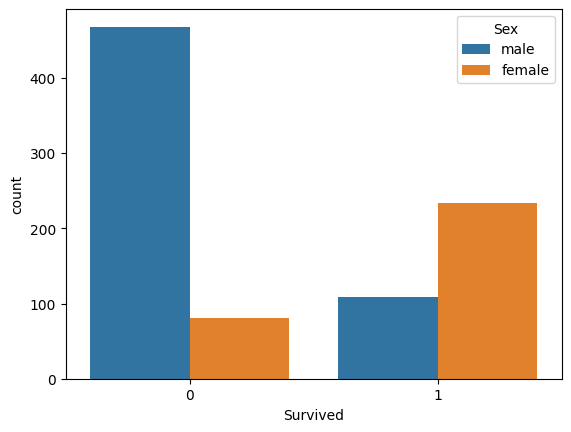

In [94]:
sns.countplot(data = new_df,x='Survived',hue='Sex')
plt.show()

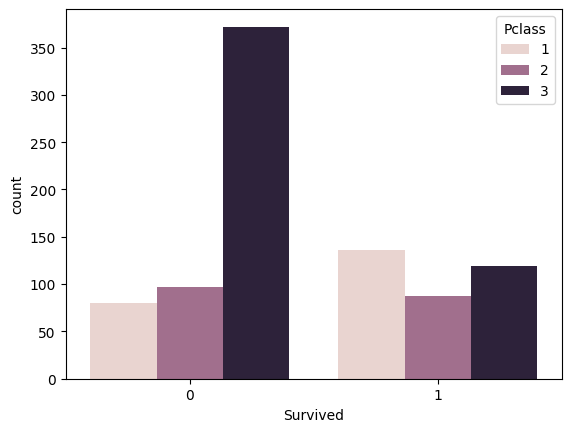

In [95]:
# sns.FacetGrid(data=new_df,col = 'Survived')
sns.countplot(data = new_df,x='Survived',hue='Pclass')
plt.show()